In [1]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

## Dados Geográficos dos Municípios

Fonte: https://www.ibge.gov.br/geociencias/organizacao-do-territorio/malhas-territoriais/15774-malhas.html

In [2]:
# Dados geograficos dos municipios
df_municipios_geo = geopandas.read_file("content/SC_MUNICIPIOS_2023/SC_Municipios_2023.dbf")

In [3]:
df_municipios_geo.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   CD_MUN      295 non-null    object  
 1   NM_MUN      295 non-null    object  
 2   CD_RGI      295 non-null    object  
 3   NM_RGI      295 non-null    object  
 4   CD_RGINT    295 non-null    object  
 5   NM_RGINT    295 non-null    object  
 6   CD_UF       295 non-null    object  
 7   NM_UF       295 non-null    object  
 8   CD_REGIAO   295 non-null    object  
 9   NM_REGIAO   295 non-null    object  
 10  CD_CONCURB  52 non-null     object  
 11  NM_CONCURB  52 non-null     object  
 12  AREA_KM2    295 non-null    float64 
 13  geometry    295 non-null    geometry
dtypes: float64(1), geometry(1), object(12)
memory usage: 32.4+ KB


In [4]:
df_municipios_geo.head()

,CD_MUN,NM_MUN,CD_RGI,NM_RGI,CD_RGINT,NM_RGINT,CD_UF,NM_UF,CD_REGIAO,NM_REGIAO,CD_CONCURB,NM_CONCURB,AREA_KM2,geometry
0,4200051,Abdon Batista,420008,Joaçaba - Herval d'Oeste,4204,Chapecó,42,Santa Catarina,4,Sul,None,None,237.517,"POLYGON ((-51.04368 -27.64094, -51.04398 -27.6..."
1,4200101,Abelardo Luz,420011,Xanxerê,4204,Chapecó,42,Santa Catarina,4,Sul,None,None,953.992,"POLYGON ((-52.12152 -26.68147, -52.12169 -26.6..."
2,4200200,Agrolândia,420022,Rio do Sul,4207,Blumenau,42,Santa Catarina,4,Sul,None,None,206.815,"POLYGON ((-49.83981 -27.52449, -49.83982 -27.5..."
3,4200309,Agronômica,420022,Rio do Sul,4207,Blumenau,42,Santa Catarina,4,Sul,None,None,129.774,"POLYGON ((-49.68847 -27.31815, -49.68822 -27.3..."
4,4200408,Água Doce,420008,Joaçaba - Herval d'Oeste,4204,Chapecó,42,Santa Catarina,4,Sul,None,None,1319.137,"POLYGON ((-51.53125 -27.05144, -51.53139 -27.0..."


In [14]:
mapa = geopandas.read_file("content/SC_MUNICIPIOS_2023/SC_Municipios_2023.shp")

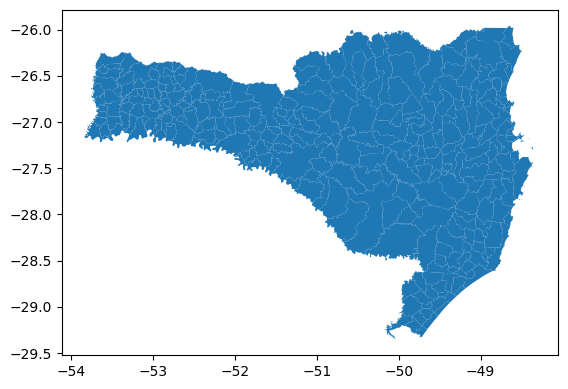

In [15]:
mapa.plot()
plt.show()

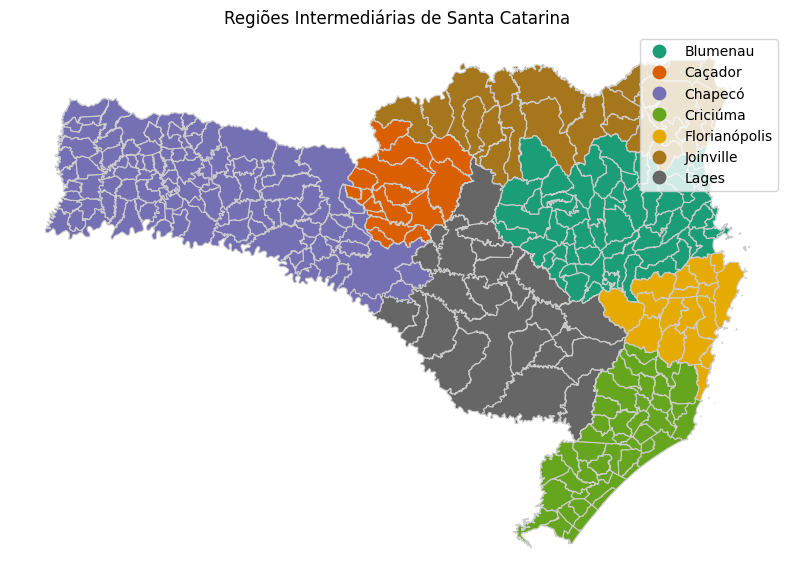

In [5]:
# Plot das Regiões Intermediárias
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
df_municipios_geo.plot(column='NM_RGINT', cmap='Dark2', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.axis('off')
ax.set_title('Regiões Intermediárias de Santa Catarina')
plt.show()

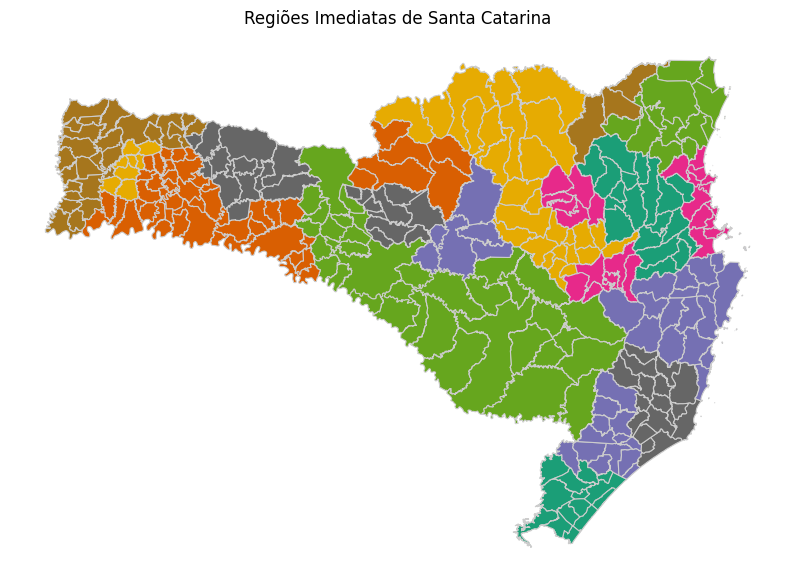

In [6]:
# Plot das Regiões Imediatas
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
df_municipios_geo.plot(column='NM_RGI', cmap='Dark2', linewidth=0.8, ax=ax, edgecolor='0.8', legend=False)
ax.axis('off')
ax.set_title('Regiões Imediatas de Santa Catarina')
plt.show()

## Dados da votação - TSE

Fonte:
https://dadosabertos.tse.jus.br/dataset/resultados-2022/resource/ff3e660a-6387-4632-97f7-9b60a477751a

In [16]:
# Dados dos votos
df_votos = pd.read_csv("content/votacao_secao_2022_SC.csv", encoding="latin1", delimiter=";")

In [17]:
df_votos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2178931 entries, 0 to 2178930
Data columns (total 26 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   DT_GERACAO                 object
 1   HH_GERACAO                 object
 2   ANO_ELEICAO                int64 
 3   CD_TIPO_ELEICAO            int64 
 4   NM_TIPO_ELEICAO            object
 5   NR_TURNO                   int64 
 6   CD_ELEICAO                 int64 
 7   DS_ELEICAO                 object
 8   DT_ELEICAO                 object
 9   TP_ABRANGENCIA             object
 10  SG_UF                      object
 11  SG_UE                      object
 12  NM_UE                      object
 13  CD_MUNICIPIO               int64 
 14  NM_MUNICIPIO               object
 15  NR_ZONA                    int64 
 16  NR_SECAO                   int64 
 17  CD_CARGO                   int64 
 18  DS_CARGO                   object
 19  NR_VOTAVEL                 int64 
 20  NM_VOTAVEL              

In [18]:
df_votos.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,NR_SECAO,CD_CARGO,DS_CARGO,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS,NR_LOCAL_VOTACAO,SQ_CANDIDATO,NM_LOCAL_VOTACAO,DS_LOCAL_VOTACAO_ENDERECO
0,01/11/2022,16:05:25,2022,2,ELEIÇÃO ORDINÁRIA,1,546,ELEIÇÕES GERAIS ESTADUAIS 2022,02/10/2022,E,...,280,6,DEPUTADO FEDERAL,4477,EDMILSON CARLOS PEREIRA JUNIOR,17,1546,240001604520,ESCOLA BÁSICA MUNICIPAL BRIGADEIRO EDUARDO GOMES,"AVENIDA PEQUENO PRÍNCIPE, N. 2939"
1,01/11/2022,16:05:25,2022,2,ELEIÇÃO ORDINÁRIA,1,546,ELEIÇÕES GERAIS ESTADUAIS 2022,02/10/2022,E,...,188,6,DEPUTADO FEDERAL,4477,EDMILSON CARLOS PEREIRA JUNIOR,3,1147,240001604520,CENTRO EDUCACIONAL MUNICIPAL RENASCER,"RUA JOSÉ ANTÔNIO PEREIRA, S/N"
2,01/11/2022,16:05:25,2022,2,ELEIÇÃO ORDINÁRIA,1,546,ELEIÇÕES GERAIS ESTADUAIS 2022,02/10/2022,E,...,188,7,DEPUTADO ESTADUAL,13222,ELVIRA TERESINHA MANFROI,2,1147,240001679663,CENTRO EDUCACIONAL MUNICIPAL RENASCER,"RUA JOSÉ ANTÔNIO PEREIRA, S/N"
3,01/11/2022,16:05:25,2022,2,ELEIÇÃO ORDINÁRIA,1,546,ELEIÇÕES GERAIS ESTADUAIS 2022,02/10/2022,E,...,62,6,DEPUTADO FEDERAL,4477,EDMILSON CARLOS PEREIRA JUNIOR,3,1058,240001604520,ESCOLA DE EDUCAÇÃO BÁSICA COMENDADOR ROCHA,"AVENIDA CALISTRATO MULLER SALLES, N. 91"
4,01/11/2022,16:05:25,2022,2,ELEIÇÃO ORDINÁRIA,1,546,ELEIÇÕES GERAIS ESTADUAIS 2022,02/10/2022,E,...,201,6,DEPUTADO FEDERAL,4477,EDMILSON CARLOS PEREIRA JUNIOR,1,1309,240001604520,ESCOLA BÁSICA MUNICIPAL ANITA GARIBALDI,"RUA DOUTOR PEDRO ZIMMERMANN, N. 5900"


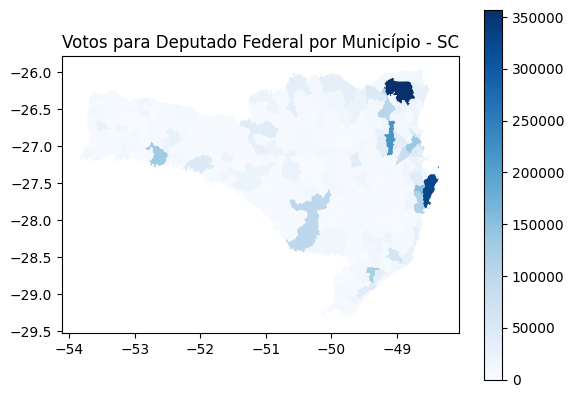

In [19]:
# Filtrar apenas votos para deputado federal
df_deputado_federal = df_votos[df_votos["DS_CARGO"] == "DEPUTADO FEDERAL"]

# Agregar os votos por município
aggregated = df_deputado_federal.groupby(["NM_MUNICIPIO"], as_index=False)["QT_VOTOS"].sum()

# Normalizar os nomes dos municípios
mapa["NM_MUNICIPIO"] = mapa["NM_MUN"].str.upper()
aggregated["NM_MUNICIPIO"] = aggregated["NM_MUNICIPIO"].str.upper()

result = mapa.merge(aggregated, on="NM_MUNICIPIO", how="left")

# Foi necessário preencher os municípios sem votos com 0 para fazer a devida agregação
result["QT_VOTOS"] = result["QT_VOTOS"].fillna(0)

result.plot(column="QT_VOTOS", cmap="Blues", legend=True)
plt.title("Votos para Deputado Federal por Município - SC")
plt.show()

## Dados do censo

Fonte:

In [21]:
# dados ja tratados
dist_pop = pd.read_csv("content/treat_data/distribuicao_populacao.csv")

In [22]:
dist_pop.head()

,id,cd_mun,nm_mun,tot_pop,abs_pop_branca,abs_pop_preta,abs_pop_amarela,abs_pop_parda,abs_pop_indigena,ignorados,perc_branca,perc_preta,perc_amarela,perc_parda,perc_indigena,abs_indigena_cor_raca,perc_indigena_cor_raca
0,5001,1100015.0,Alta Floresta D'Oeste,21494.0,7590.0,1297.0,46.0,11845.0,715.0,1.0,35.3,6.0,0.2,55.1,3.3,749.0,3.5
1,5002,1100023.0,Ariquemes,96833.0,31263.0,9619.0,317.0,55534.0,97.0,3.0,32.3,9.9,0.3,57.4,0.1,98.0,0.1
2,5003,1100031.0,Cabixi,5351.0,2136.0,345.0,12.0,2856.0,2.0,0.0,39.9,6.4,0.2,53.4,0.0,10.0,0.2
3,5004,1100049.0,Cacoal,86887.0,32304.0,6704.0,365.0,45836.0,1675.0,3.0,37.2,7.7,0.4,52.8,1.9,1688.0,1.9
4,5005,1100056.0,Cerejeiras,15890.0,6213.0,1025.0,59.0,8580.0,13.0,0.0,39.1,6.5,0.4,54.0,0.1,23.0,0.1


In [24]:
pib_municipios = pd.read_csv("content/treat_data/pib_municipios.csv")

In [25]:
pib_municipios.head()

,id,ano,cd_grande_regiao,nm_grande_regiao,cd_uf,sg_uf,nm_uf,cd_mun,nm_mun,reg_metrop,...,vb_indust,vb_servicos,vb_adm,vb_total,impostos,pib,pip_per_capita,atv_maior_vb,atv_seg_maior_vb,atv_terc_maior_vb
0,1,2020,3,Sudeste,33,RJ,Rio de Janeiro,3303609,Paracambi,Região Metropolitana do Rio de Janeiro,...,123019,416491,368456,911581,89691,1001272,1900559,"Administração, defesa, educação e saúde públic...",Demais serviços,Indústrias de transformação
1,2,2020,3,Sudeste,33,RJ,Rio de Janeiro,3303708,Paraíba do Sul,NaN,...,179139,465120,344700,1088320,213894,1302214,2925140,Demais serviços,"Administração, defesa, educação e saúde públic...",Indústrias de transformação
2,3,2020,3,Sudeste,33,RJ,Rio de Janeiro,3303807,Paraty,NaN,...,432795,732246,402186,1604297,115193,1719490,3936562,Demais serviços,"Administração, defesa, educação e saúde públic...",Indústrias extrativas
3,4,2020,3,Sudeste,33,RJ,Rio de Janeiro,3303856,Paty do Alferes,NaN,...,52656,222047,236981,551907,87737,639645,2296090,"Administração, defesa, educação e saúde públic...",Demais serviços,Comércio e reparação de veículos automotores e...
4,5,2020,3,Sudeste,33,RJ,Rio de Janeiro,3303906,Petrópolis,Região Metropolitana do Rio de Janeiro,...,4398929,6919415,2257630,13636133,1752159,15388292,5017736,Demais serviços,Indústrias de transformação,"Administração, defesa, educação e saúde públic..."


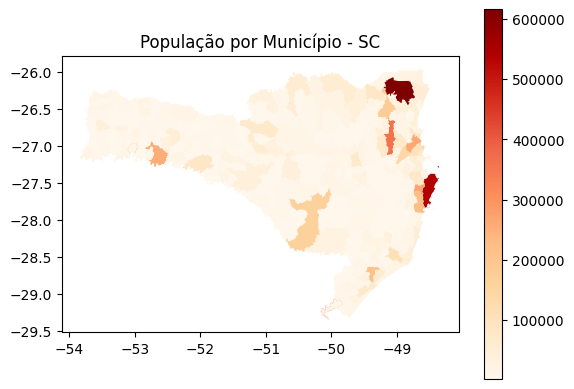

In [27]:
mapa2 = geopandas.read_file("content/SC_MUNICIPIOS_2023/SC_Municipios_2023.shp")

# Normalizar os nomes dos municípios
dist_pop["nm_mun"] = dist_pop["nm_mun"].str.upper()
mapa2["NM_MUNICIPIO"] = mapa2["NM_MUN"].str.upper()

# Merge dos dados de população com o mapa
mapa_pop = mapa2.merge(dist_pop, left_on="NM_MUNICIPIO", right_on="nm_mun", how="left")

# Preencher valores nulos com 0
mapa_pop["tot_pop"] = mapa_pop["tot_pop"].fillna(0)

mapa_pop.plot(column="tot_pop", cmap="OrRd", legend=True)
plt.title("População por Município - SC")
plt.show()

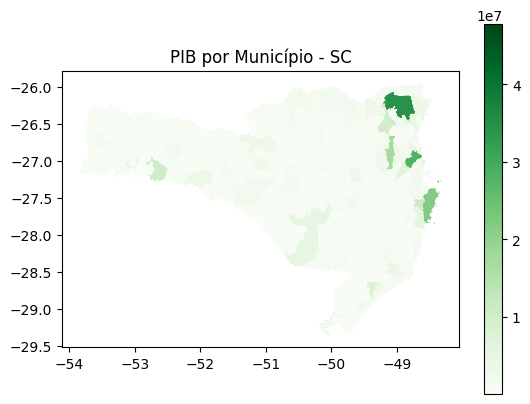

In [28]:
mapa_pib = geopandas.read_file("content/SC_MUNICIPIOS_2023/SC_Municipios_2023.shp")

# Normalizar os nomes dos municípios
pib_municipios["nm_mun"] = pib_municipios["nm_mun"].str.upper()
mapa_pib["NM_MUNICIPIO"] = mapa_pib["NM_MUN"].str.upper()

# Merge dos dados do PIB com o mapa
mapa_pib = mapa_pib.merge(pib_municipios, left_on="NM_MUNICIPIO", right_on="nm_mun", how="left")

# Preencher valores nulos com 0
mapa_pib["pib"] = mapa_pib["pib"].fillna(0)

# Plotar o mapa com a coluna do PIB
mapa_pib.plot(column="pib", cmap="Greens", legend=True)
plt.title("PIB por Município - SC")
plt.show()

## Dados transferências municipais do estado de SC

Fonte dos dados: https://dados.sc.gov.br/dataset/transferencias

In [29]:
raw_data = pd.read_csv("content/transferencias-municipais.csv", delimiter=';', encoding='ISO-8859-1')

raw_data.head()

,nuanoexercicio,nmmunicipiocredor,cdunidadegestora,nmunidadegestora,cdcredor,nmcredor,nuidentificacao,cdtipoidentificacao,cdfuncao,nmfuncao,...,deobjeto,vlglobal,cdmodalidadeaplicacao,vlrepasse,vlcontrapartida,nucpfresponsavelconcedente,nmresponsavelconcedente,dtcelebracao,nupreparacaopagamento,dtlancamentoliquidacao
0,2022,VARGEAO,530001,Secretaria de Estado da Infraestrutura e Mobil...,5896,MUNICIPIO DE VARGEAO,83009928000164,1,26,Transporte,...,NaN,NaN,40,0,0,NaN,NaN,NaN,NaN,2022-03-08 00:00:00
1,2022,CACADOR,480091,Fundo Estadual de Saúde,227634,FUNDO MUNICIPAL DE SAUDE DE CACADOR,11583495000145,1,10,Saúde,...,NaN,NaN,41,0,0,NaN,NaN,NaN,2022PP022908,2022-03-15 00:00:00
2,2022,CHAPECO,480091,Fundo Estadual de Saúde,118794,FUNDO MUNICIPAL DE SAUDE DE CHAPECO,80636475000108,1,10,Saúde,...,NaN,NaN,41,0,0,NaN,NaN,NaN,2022PP022910,2022-03-15 00:00:00
3,2022,ITUPORANGA,480091,Fundo Estadual de Saúde,200338,FUNDO MUNICIPAL DE SAUDE DE ITUPORANGA,11407443000118,1,10,Saúde,...,NaN,NaN,41,0,0,NaN,NaN,NaN,NaN,2022-03-15 00:00:00
4,2022,SANTIAGO DO SUL,450001,Secretaria de Estado da Educação,91511,APP DA ESCOLA DE EDUCACAO BASICA SAO TIAGO,83697334000193,1,12,Educação,...,NaN,NaN,50,0,0,NaN,NaN,NaN,2022PP003678,2022-01-27 00:00:00


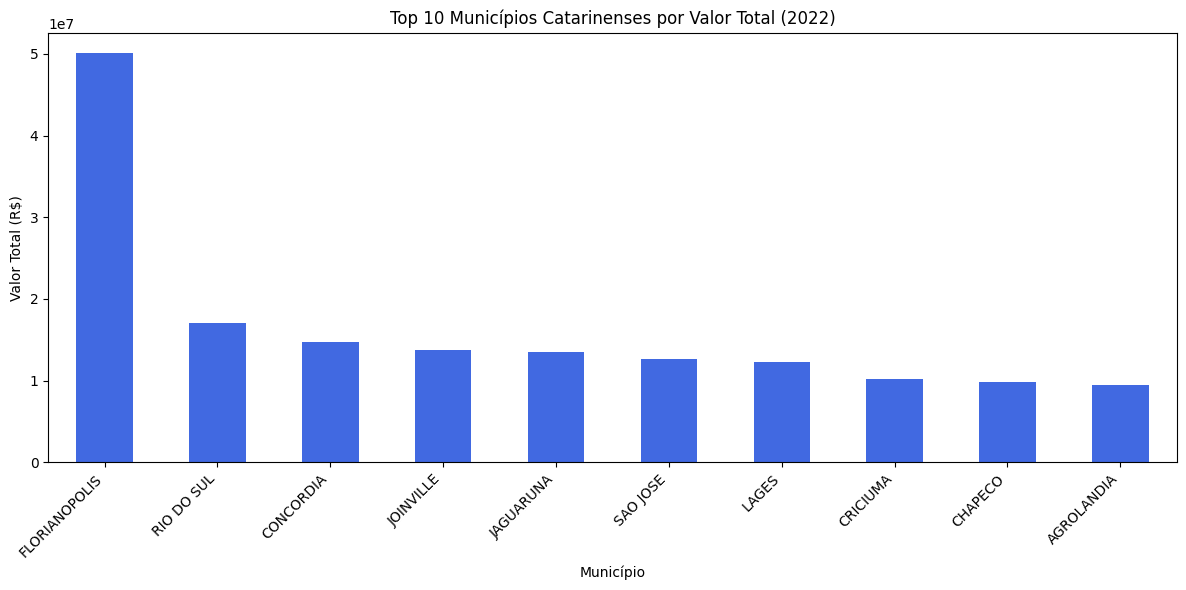

In [ ]:
import re

# Limpeza e correção de caracteres corrompidos
raw_data.columns = [col.strip().replace('Ã', 'A').replace('�', '') for col in raw_data.columns]
raw_data['nmmunicipiocredor'] = raw_data['nmmunicipiocredor'].str.replace('�', 'A')
raw_data['nmfuncao'] = raw_data['nmfuncao'].str.replace('�', 'A')
raw_data['nmsubfuncao'] = raw_data['nmsubfuncao'].str.replace('�', 'A')

def clean_text(text):
    text = text.upper()  
    text = re.sub(r'[Ã]', 'A', text)
    text = re.sub(r'[ÁÀÂÃ]', 'A', text)
    text = re.sub(r'[ÉÈÊ]', 'E', text)
    text = re.sub(r'[ÍÌÎ]', 'I', text)
    text = re.sub(r'[ÓÒÔÕ]', 'O', text)
    text = re.sub(r'[ÚÙÛ]', 'U', text)
    text = re.sub(r'[Ç]', 'C', text)
    text = re.sub(r'[^A-Z\s]', '', text)  
    return text

raw_data['nmmunicipiocredor'] = raw_data['nmmunicipiocredor'].apply(clean_text)

municipios_sc = df_municipios_geo['NM_MUN'].apply(clean_text).unique()

# Filtrar apenas municípios de SC com base em df_municipios_geo
raw_data = raw_data[raw_data['nmmunicipiocredor'].isin(municipios_sc)]

# Converter colunas de valor para numérico
raw_data['vlempenhado'] = pd.to_numeric(raw_data['vlempenhado'], errors='coerce')
raw_data['vlliquidado'] = pd.to_numeric(raw_data['vlliquidado'], errors='coerce')
raw_data['vlpagoorcamentario'] = pd.to_numeric(raw_data['vlpagoorcamentario'], errors='coerce')

# Remover linhas com valores nulos em "vlempenhado"
raw_data = raw_data.dropna(subset=['vlempenhado'])

# Agregar os valores por município e função
dados_transf = raw_data.groupby(['nmmunicipiocredor', 'nmfuncao'])[['vlempenhado', 'vlliquidado', 'vlpagoorcamentario']].sum().reset_index()

# Visualização: Top 10 municípios por valor total (emp., liqu. ou pago)
plt.figure(figsize=(12, 6))
dados_transf['valor_total'] = dados_transf['vlempenhado'] + dados_transf['vlliquidado'] + dados_transf['vlpagoorcamentario']
top_municipios = dados_transf.groupby('nmmunicipiocredor')['valor_total'].sum().nlargest(10)

top_municipios.plot(kind='bar', color='royalblue')
plt.title('Top 10 Municípios Catarinenses por Valor Total (2022)')
plt.xlabel('Município')
plt.ylabel('Valor Total (R$)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Possível ter uma ideia dos municipios que mais recebem transferências
# Verificar agora uma possível correlação entre o valor total e número de votos para deputado federal

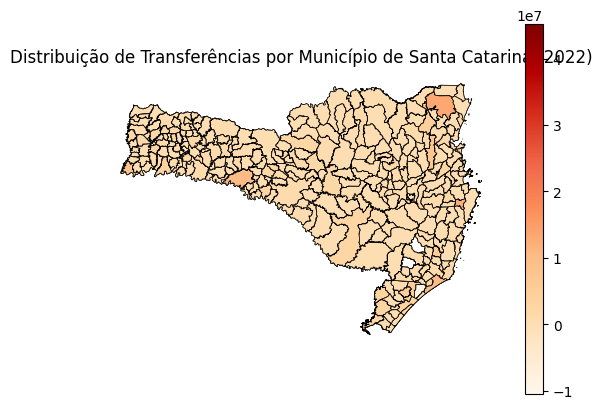

In [31]:
# Carregar o arquivo .shp do mapa
mapa_transf = geopandas.read_file("content/SC_MUNICIPIOS_2023/SC_Municipios_2023.shp")

# Normalizar os nomes dos municípios
mapa_transf["NM_MUNICIPIO"] = mapa_transf["NM_MUN"].apply(clean_text)

# Mesclar os dados de transferência agregados com os dados geográficos
gdf_transferencias = mapa_transf.merge(dados_transf, left_on='NM_MUNICIPIO', right_on='nmmunicipiocredor', how='left')

gdf_transferencias.plot(column='valor_total', cmap='OrRd', legend=True, edgecolor='black', linewidth=0.5)
plt.title('Distribuição de Transferências por Município de Santa Catarina (2022)')
plt.axis('off')
plt.show()

dados_transf.to_csv('content/transferencias_aggregadas_sc.csv', index=False)

# Possível visualizar a correlação entre quantidade de transferências por município e quantidade de votos